# Lemmatisierer Evaluierung

In [1]:
import glob
import json
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
FILES = glob.glob("results-*.json")
data = []
for FILE in FILES:
    with open(FILE, "r") as fp:
        data += json.load(fp)

In [3]:
len(data)

47

In [4]:
algos = ["baseline", "germalemma", "simplemma", "spacy2", "spacy3", "spacy33+", "stanza", "trankit"]

In [5]:
corpora = ["ud-hdt", "ud-gsd", "ud-pud", "germanc", "archimob", "nosta-d"]

In [58]:
def generate_table(df, feature, plot=True):
    table = pd.DataFrame(columns=['algorithm']+corpora)
    line = []
    algo_index = 0
    for d in data:
        if d['dataset'] == 'archimob' or len(line)==4:  # error reading in
            line.append(0)
            continue
        if type(feature) == str:
            line.append(d[feature])
        elif type(feature) == list:
            if feature[0]:
                if feature[1]:
                    if feature[2]:
                        line.append(d[feature[0]][feature[1]][feature[2]])
                    else:
                        line.append(d[feature[0]][feature[1]])
        if d['dataset'] == 'nosta-d':  # last corpus reached
            table.loc[len(table)] = [algos[algo_index]] + line
            line = []
            algo_index += 1  # next algorithm
    table = table.set_index('algorithm')
    table = table.astype(float)
    if plot:
        sns.heatmap(table, cmap="YlGnBu")
    return table

,ud-hdt,ud-gsd,ud-pud,germanc,archimob,nosta-d
algorithm,,,,,,
baseline,0.536198,0.626204,0.589665,0.661715,0.0,0.640902
germalemma,0.664878,0.834278,0.792086,0.807672,0.0,0.853261
simplemma,0.761704,0.909915,0.903672,0.837410,0.0,0.890600
spacy2,0.752028,0.875496,0.871936,0.846921,0.0,0.834742
spacy3,0.752028,0.875496,0.871936,0.846921,0.0,0.834742
spacy33+,0.779009,0.959490,0.941003,0.841505,0.0,0.880535
stanza,0.784739,0.941076,0.941410,0.838622,0.0,0.884964


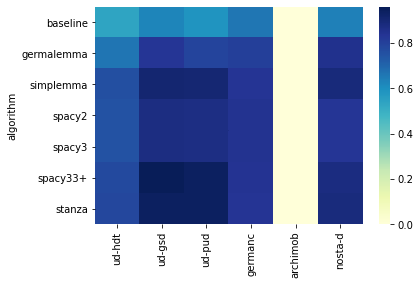

In [62]:
# accuracy
generate_table(data, ['metrics','overall','accuracy'])

,ud-hdt,ud-gsd,ud-pud,germanc,archimob,nosta-d
algorithm,,,,,,
baseline,0.000008,0.042235,0.001395,0.001457,0.0,0.000002
germalemma,2.144125,0.057110,0.117779,3.326020,0.0,0.065338
simplemma,1.203707,0.037724,0.036087,0.976444,0.0,0.023459
spacy2,37.564708,2.061178,2.725797,83.411965,0.0,5.341197
spacy3,2.958954,0.248304,0.198066,6.455835,0.0,0.206511
spacy33+,487.363728,32.124115,33.378052,1033.347623,0.0,65.591092
stanza,196.215316,7.175498,11.535709,359.056531,0.0,17.571828


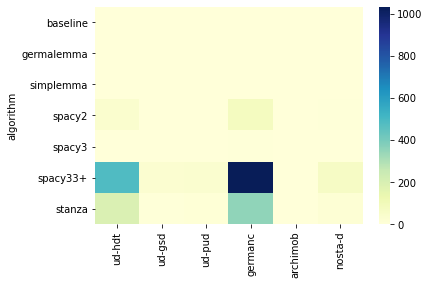

In [59]:
generate_table(data, 'elapsed')

,ud-hdt,ud-gsd,ud-pud,germanc,archimob,nosta-d
algorithm,,,,,,
baseline,72.0,0.0,48.0,4.800000e+01,0.0,0.0
germalemma,29336563.0,445398.0,1072563.0,3.541075e+07,0.0,806812.0
simplemma,172822097.0,600854.0,3297621.0,2.324640e+07,0.0,624402.0
spacy2,352450412.0,13165989.0,17276251.0,6.443319e+08,0.0,27713953.0
spacy3,158755092.0,9207884.0,8302646.0,3.114068e+08,0.0,17347294.0
spacy33+,251155751.0,13974444.0,14264471.0,5.116736e+08,0.0,30928058.0
stanza,497860142.0,24898789.0,32443298.0,1.185841e+09,0.0,62312916.0


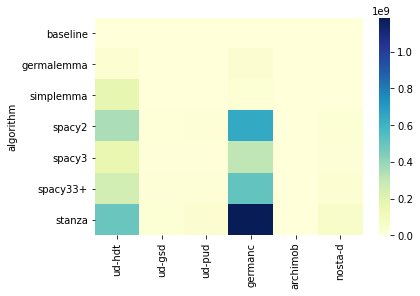

In [60]:
generate_table(data, 'memory_peak')

,ud-hdt,ud-gsd,ud-pud,germanc,archimob,nosta-d
algorithm,,,,,,
baseline,0.652800,0.386689,0.424980,0.352242,0.0,0.363274
germalemma,0.616180,0.286938,0.325927,0.245130,0.0,0.213315
simplemma,0.417344,0.097093,0.097799,0.171532,0.0,0.109687
spacy2,0.420419,0.120734,0.119896,0.155108,0.0,0.156270
spacy3,0.420419,0.120734,0.119896,0.155106,0.0,0.156270
spacy33+,0.394446,0.044065,0.058771,0.157233,0.0,0.118611
stanza,0.394239,0.063525,0.059862,0.171980,0.0,0.121092


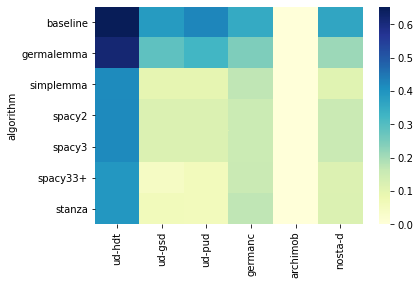

In [61]:
generate_table(data, ['metrics','overall','log-levenshtein'])

,ud-hdt,ud-gsd,ud-pud,germanc,archimob,nosta-d
algorithm,,,,,,
baseline,0.706440,0.431465,0.467456,0.398741,0.0,0.443845
germalemma,0.636825,0.291662,0.336340,0.262134,0.0,0.227360
simplemma,0.448195,0.115795,0.114000,0.199836,0.0,0.138291
spacy2,0.448770,0.139006,0.133494,0.179024,0.0,0.198835
spacy3,0.448770,0.139006,0.133494,0.179023,0.0,0.198835
spacy33+,0.417302,0.053687,0.066154,0.179095,0.0,0.150091
stanza,0.416074,0.071576,0.065474,0.194123,0.0,0.146213


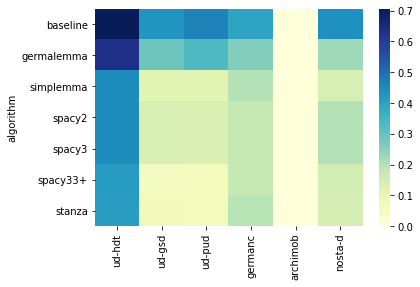

In [66]:
generate_table(data, ['metrics','overall','log-levenshtein2'])

,ud-hdt,ud-gsd,ud-pud,germanc,archimob,nosta-d
algorithm,,,,,,
baseline,1.909268,0.737819,0.803174,0.679963,0.0,0.683676
germalemma,2.110251,0.883569,0.944665,0.618507,0.0,0.583535
simplemma,1.431017,0.198159,0.183603,0.335830,0.0,0.210044
spacy2,1.459763,0.235127,0.219510,0.297482,0.0,0.287641
spacy3,1.459763,0.235127,0.219510,0.297479,0.0,0.287641
spacy33+,1.373393,0.095751,0.109043,0.294759,0.0,0.224134
stanza,1.403137,0.137535,0.126742,0.351647,0.0,0.247987


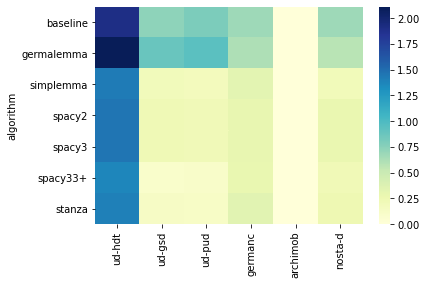

In [67]:
generate_table(data, ['metrics','overall','levenshtein'])

,ud-hdt,ud-gsd,ud-pud,germanc,archimob,nosta-d
algorithm,,,,,,
baseline,0.304754,0.115507,0.122740,0.119633,0.0,0.121739
germalemma,0.337802,0.143275,0.154404,0.091475,0.0,0.097577
simplemma,0.227112,0.027318,0.024778,0.048959,0.0,0.034267
spacy2,0.234648,0.036500,0.035404,0.046863,0.0,0.049689
spacy3,0.234648,0.036500,0.035404,0.046862,0.0,0.049689
spacy33+,0.220426,0.015153,0.018586,0.042070,0.0,0.038821
stanza,0.224465,0.020478,0.018821,0.051890,0.0,0.040830


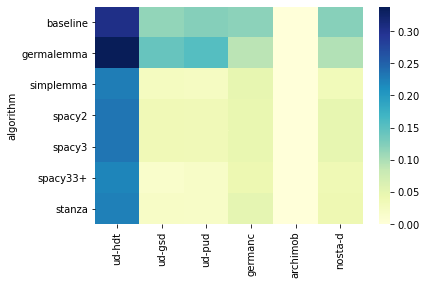

In [68]:
generate_table(data, ['metrics','overall','levenshtein-wordlen'])

In [ ]:
# highest levenshtein diffs on ud-hdt, interesting!
# no huge difference between different levenshtein measures
# (for algos and corpora, but maybe diff with POS?)

In [63]:
# pos tag comparison based on accuracy
pos = pd.DataFrame()
dataset = "ud-hdt"

for item in data:
    lem = item["lemmatizer"]
    if (item['dataset'] == dataset) and (item["lemmatizer"] in algos) and (item["lemmatizer"] not in pos.columns) and ('metrics' in item):
        tmp = pd.DataFrame.from_dict(item['metrics']).T
        tmp[lem] = tmp['accuracy']
        pos = pd.merge(pos, tmp[lem], left_index=True, right_index=True, how='right')

In [64]:
pos.head()

,baseline,germalemma,simplemma,spacy2,spacy3,spacy33+,stanza,trankit
overall,0.536198,0.664878,0.761704,0.752028,0.752028,0.779009,0.784739,0.768195
NOUN,0.469929,0.630632,0.639578,0.626212,0.626212,0.634975,0.628757,0.619140
VERB,0.359337,0.981057,0.803979,0.944000,0.944000,0.975544,0.957927,0.920995
ADV,0.847461,0.963746,0.975112,0.861142,0.861142,0.988424,0.988687,0.975270
ADJ,0.319202,0.689077,0.745471,0.654441,0.654441,0.689277,0.737671,0.734672


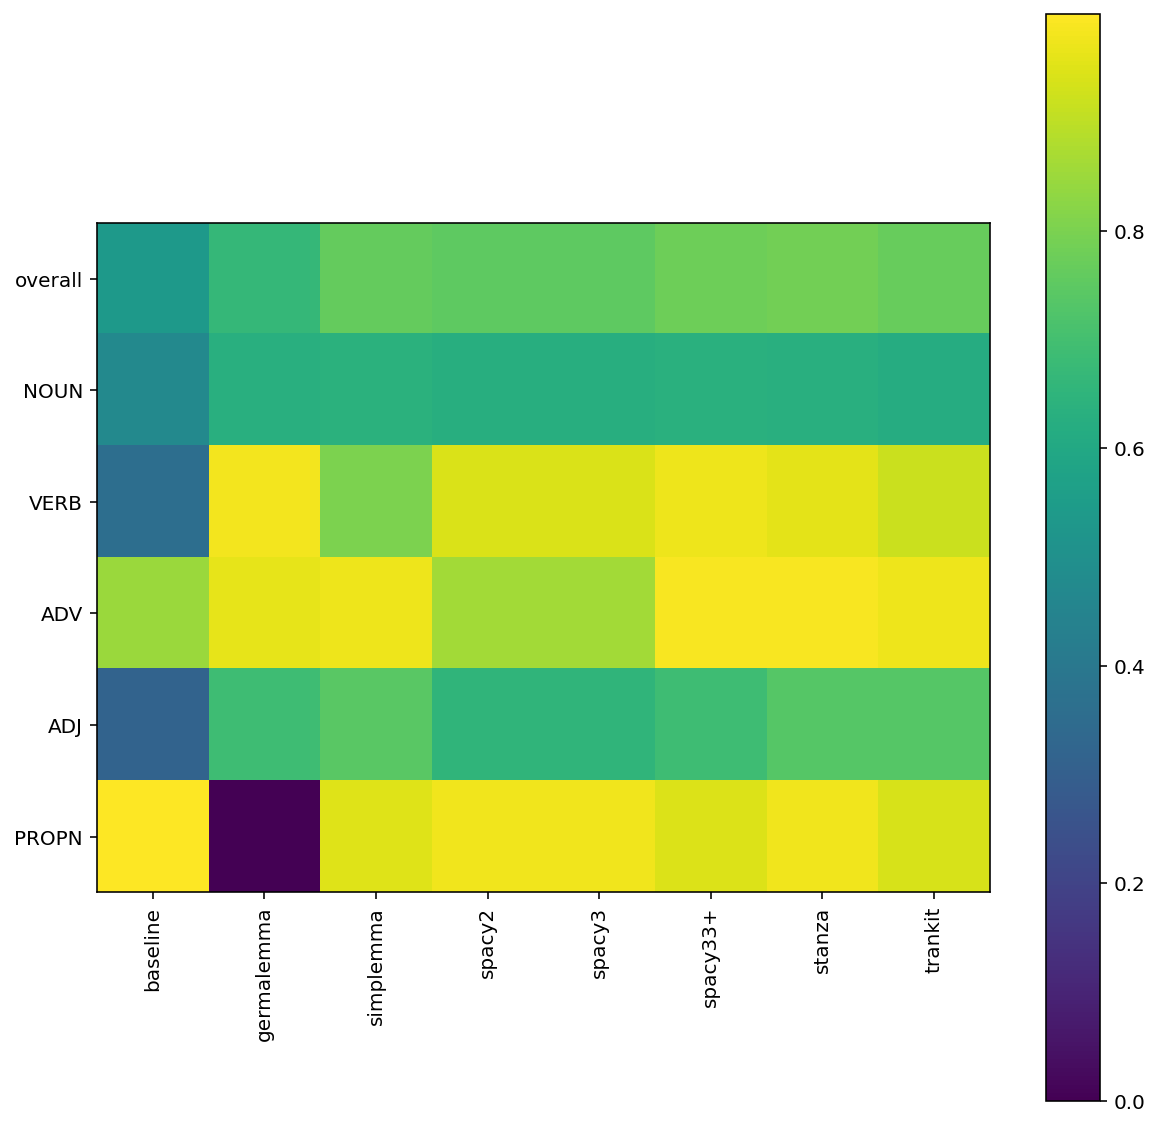

In [65]:
from matplotlib.pyplot import figure
figure(figsize=(10, 10), dpi=144)
plt.imshow(pos.values)
#plt.imshow(df.fillna(0).values)
plt.xticks(range(len(algos)), algos, rotation=90)
plt.yticks(range(len(pos.index)), pos.index, rotation=0)
plt.colorbar();
plt.show();

Observations:
* baseline (unsurprisingly) performs best with least inflected word categories: adverbs and proper nouns
* germalemma performs worst on proper nouns
* simplemma (unlike other algos) performs better with adjectives, worse with verbs
* spacys(2,3,3.3): improved for almost all categories, but not proper nouns, interesting! 
* similar pattern for stanza & trankit: very good on all categories, worst on nouns and adjectives